In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
sns.set_theme(style="whitegrid")
from helper import meld_score, get_sb, get_inr, get_sc, get_na

In [6]:
sns.set(rc={'figure.figsize':(11.7,18.27)})

In [7]:
THRESHOLD = 20

In [8]:
n_points = 1000
sbs = [get_sb() for _ in range(n_points)] + [get_sb(healthy=False) for _ in range(n_points)]
inrs = [get_inr()]*n_points + [get_inr(healthy=False)]*n_points 
scs = [get_sc()]*n_points + [get_sc(healthy=False)]*n_points  
nas = [get_na() for _ in range(n_points)] + [get_na(healthy=False) for _ in range(n_points)]
health = ["healthy"]*n_points + ["unhealthy"]*n_points

data = pd.DataFrame({
    "bilirubin": sbs,
    "INR": inrs,
    "creatinine": scs,
    "na": nas,
    "MELD-Na": [meld_score(sb,inr,sc,na) for sb,inr,sc,na in zip(sbs,inrs,scs,nas)],
    "health": health 
})

data.head()

,bilirubin,INR,creatinine,na,MELD-Na,health
0,0.566397,0.924824,1.034324,144.021520,6.752965,healthy
1,0.816179,0.924824,1.034324,140.035768,6.752965,healthy
2,1.449150,0.924824,1.034324,142.721556,8.155258,healthy
3,1.314065,0.924824,1.034324,136.769208,8.030731,healthy
4,0.999017,0.924824,1.034324,140.224939,6.752965,healthy


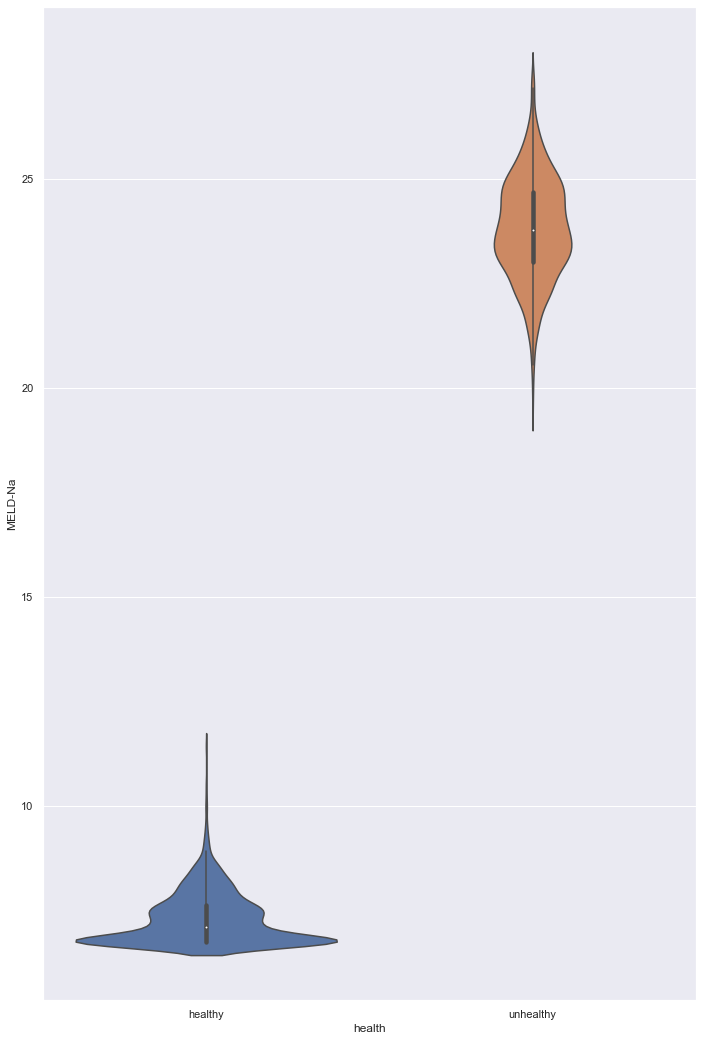

In [9]:
ax = sns.violinplot(x = "health", y = "MELD-Na", data=data)

In [10]:
fp = len(data[(data['MELD-Na']>=THRESHOLD) & (data['health']=="healthy")]) / n_points
fn = len(data[(data['MELD-Na']<THRESHOLD) & (data['health']=="unhealthy")]) / n_points

print(f"False positives rate: {fp}")
print(f"False negatives rate: {fn} (Can lead to patients at risk not receiving enough treatment)")

False positives rate: 0.0
False negatives rate: 0.001 (Can lead to patients at risk not receiving enough treatment)
